# manueverMotifs: motif extraction
## Driver D6 - Lateral acceleration

### 29/09/2019

***

**Contents**

1. [Imports and parameters](#section1)
2. [Aggressive trip](#section2)
3. [Drowsy trip](#section3)
4. [Normal trip](#section4)
5. [Secondary road trip](#section5)

***

<a id='section1'></a>
## 1. Imports and parameters

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import time
import numpy as np
import pickle
from extendedMD.emd import find_motifs_from_emd
from extendedMD.pruning import prune_motifs_with_mdl

# local code
import sys
import os
sys.path.insert(0, os.path.abspath('../scripts'))
import uah_utils
import motif_utils
import lat_viz

In [3]:
import warnings
warnings.filterwarnings('ignore')

#### Parameters:

* max distance of R = 0.1
* 5 letters alphabet
* No adaptive breakpoints
* 10Hz frequency
* 2 seconds windows
* 2 letters sax words

In [4]:
cwd = os.getcwd()
data_folder = os.path.abspath(os.path.join(cwd, os.pardir, os.pardir, 'data-uah/D6'))
output_folder = os.path.abspath(os.path.join(cwd, os.pardir, 'data-motifs'))

R = 0.1
alphabet_size = 5
adaptive_break_points = False
freq_per_second = 10
paa_size = 2
win_size = freq_per_second * 2

<a id='section2'></a>
## 2. Aggressive trip

In [5]:
driver_df = uah_utils.get_full_point_uah_data(data_folder, freq_per_second)
trip_df = driver_df[driver_df['trip_id']=='20151221120051'].reset_index(drop=True)
file_name = "motif_lat_" + trip_df["trip_label"][0] + "_" + trip_df["road"][0] + ".p"
ts = trip_df['ay'].values

start_time = time.time()
motif_dic_list, ts_1d = find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
pickle.dump(motif_dic_list, open(os.path.join(output_folder, file_name), 'wb'))
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

len(motif_dic_list)

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
Motif candidates of size 11 successfully extracted
Motif candidates of size 12 successfully extracted
Motif candidates of size 13 successfully extracted
Motif candidates of size 14 successfully extracted
Motif candidates of size 15 successfully extracted
Motif candidates of size 16 successfully extracted
Motif candidates of size 17 successfully extracted
Motif candidates of size 18 successfully extracted
Motif candidates of size 19 successfully extracted
Motif candidates of size 20 successfully

634

In [6]:
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = motif_utils.get_motif_turn_labels_df(pruned_motif_dic_list, trip_df)
pruned_motif_df

,pattern,mdl_cost,mean_dist,pattern_len,n_motifs,turn_events,turn_ratio,lc_right,lc_right_ratio,lc_left,lc_left_ratio
0,[cc],37424.26,0.08,22,106,1,0.009434,0,0.000000,2,0.018868
1,[eb],62000.45,0.07,24,10,0,0.000000,4,0.400000,1,0.100000
2,"[be, ce]",64597.81,0.08,23,8,2,0.250000,1,0.125000,3,0.375000
3,"[ca, ba]",67075.91,0.08,25,8,5,0.625000,4,0.500000,1,0.125000
4,"[ca, ba, aa, ab]",75775.33,0.06,34,3,2,0.666667,2,0.666667,0,0.000000
5,"[aa, ab, ac, ad, ae]",76899.46,0.05,35,2,1,0.500000,0,0.000000,1,0.500000
6,"[dc, cd, be]",77430.18,0.05,29,2,0,0.000000,1,0.500000,0,0.000000


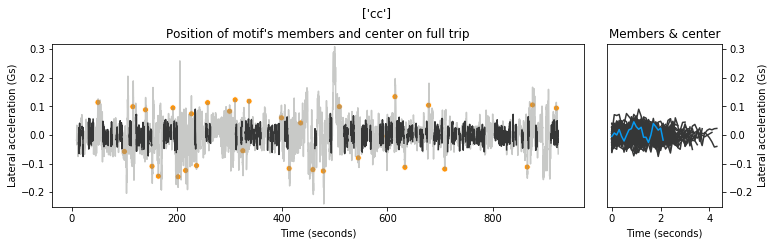

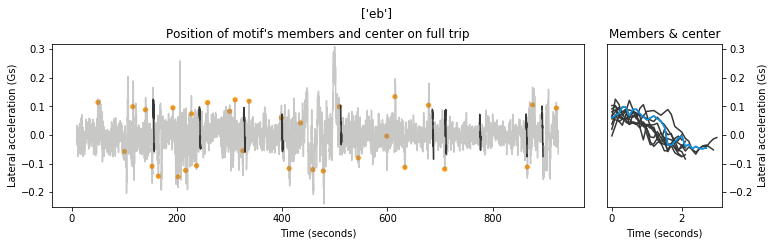

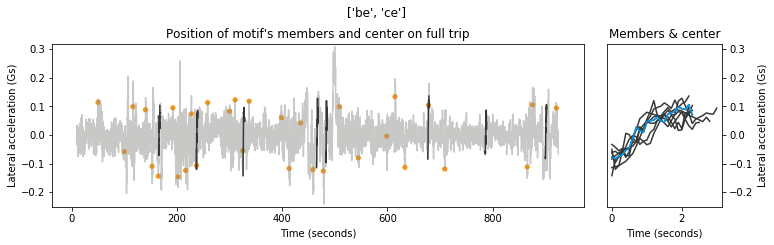

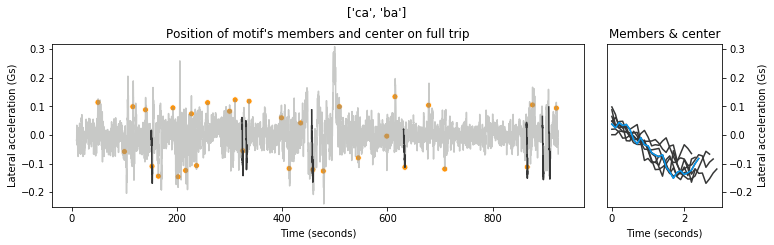

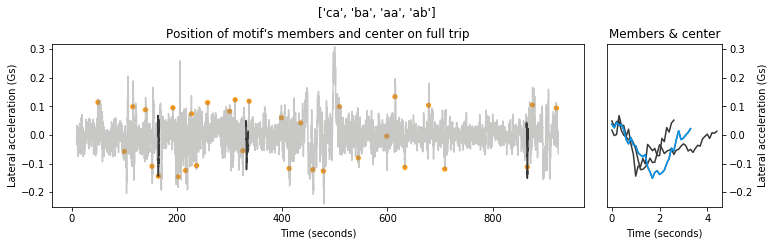

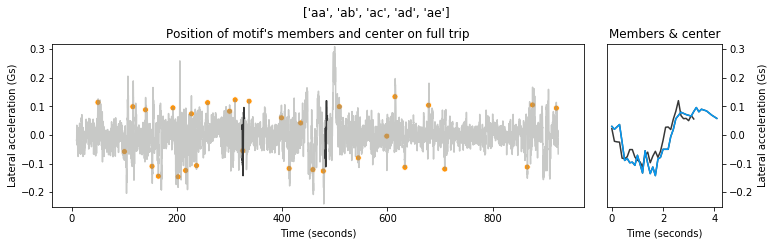

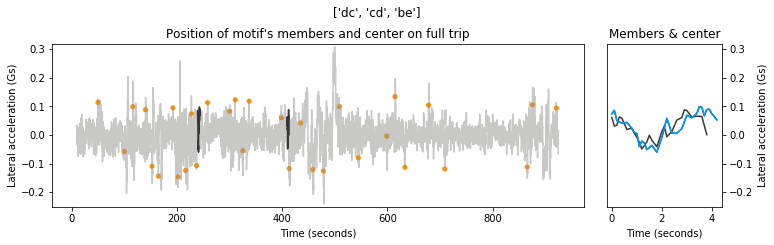

In [7]:
lat_viz.plot_k_lat_motifs(len(pruned_motif_df), trip_df, pruned_motif_dic_list)

In [8]:
motif_utils.get_limits_df(pruned_motif_dic_list[1:], trip_df)

,start,end,pattern,start_ts,end_ts
0,1387,1408,['eb'],154.9,157.0
1,2209,2232,['eb'],242.4,245.1
2,3018,3041,['eb'],327.0,330.0
3,3700,3720,['eb'],399.0,401.1
4,4753,4773,['eb'],511.1,513.1
5,6397,6418,['eb'],685.6,687.7
6,6617,6638,['eb'],709.4,712.3
7,7226,7246,['eb'],775.4,777.4
8,8056,8077,['eb'],863.6,865.7
9,8339,8359,['eb'],893.8,895.8


In [9]:
center_acc_list = []
for motif_dic in motif_dic_list:
    motif_center_acc = [ts[i] for i in motif_dic['center_ts_pointers']]
    center_acc_list.append(motif_center_acc)
center_dist_mat = motif_utils.compute_dtw_distance_matrix(center_acc_list, parallel=True)
file_name = "dist_lat_" + trip_df["trip_label"][0] + "_" + trip_df["road"][0] + ".npy"
np.save(open(os.path.join(output_folder, file_name), 'wb'), center_dist_mat)

Distance matrix computed in 7.4 minutes


<a id='section3'></a>
## 3. Drowsy trip

In [10]:
driver_df = uah_utils.get_full_point_uah_data(data_folder, freq_per_second)
trip_df = driver_df[driver_df['trip_id']=='20151217164730'].reset_index(drop=True)
file_name = "motif_lat_" + trip_df["trip_label"][0] + "_" + trip_df["road"][0] + ".p"
ts = trip_df['ay'].values

start_time = time.time()
motif_dic_list, ts_1d = find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
pickle.dump(motif_dic_list, open(os.path.join(output_folder, file_name), 'wb'))
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

len(motif_dic_list)

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
Motif candidates of size 11 successfully extracted
Motif candidates of size 12 successfully extracted
Motif candidates of size 13 successfully extracted
Motif candidates of size 14 successfully extracted
Motif candidates of size 15 successfully extracted
Motif candidates of size 16 successfully extracted
Motif candidates of size 17 successfully extracted
Motif candidates of size 18 successfully extracted
ExtendedMD algorithm run in 8.94 minutes


1464

In [11]:
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = motif_utils.get_motif_turn_labels_df(pruned_motif_dic_list, trip_df)
pruned_motif_df

,pattern,mdl_cost,mean_dist,pattern_len,n_motifs,turn_events,turn_ratio,lc_right,lc_right_ratio,lc_left,lc_left_ratio
0,[cd],47095.28,0.07,20,115,2,0.017391,3,0.026087,1,0.008696
1,[ab],54062.02,0.08,26,64,5,0.078125,1,0.015625,0,0.000000
2,"[eb, ea]",73085.42,0.07,25,16,1,0.062500,0,0.000000,0,0.000000
3,"[ea, da, ca, ba, aa, ab, ac]",88528.20,0.06,38,4,1,0.250000,0,0.000000,0,0.000000
4,"[ae, be]",90108.93,0.07,25,5,1,0.200000,0,0.000000,0,0.000000
5,"[ac, ad, bd, be, ce, de, dd, ed, ec, eb, ea]",93731.61,0.06,45,3,0,0.000000,0,0.000000,0,0.000000
6,"[de, ee, ed, ee]",94839.67,0.05,49,2,0,0.000000,0,0.000000,0,0.000000
7,"[ae, be, ce, de, ee, ed, ec, eb]",98415.72,0.05,57,2,1,0.500000,0,0.000000,0,0.000000


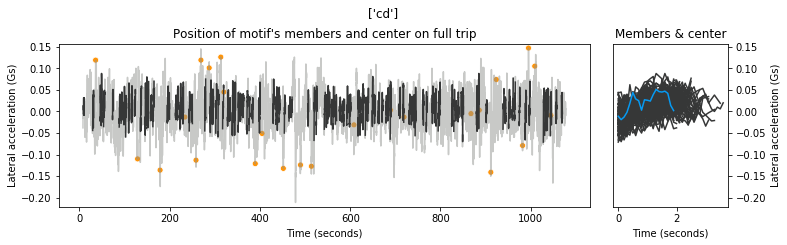

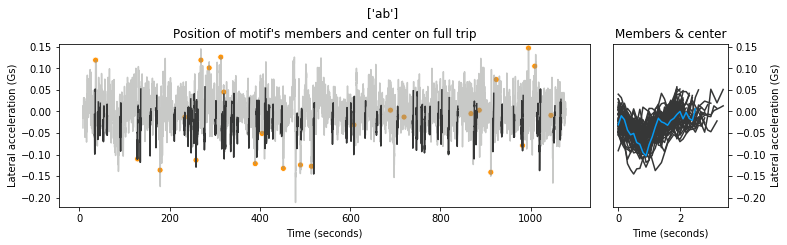

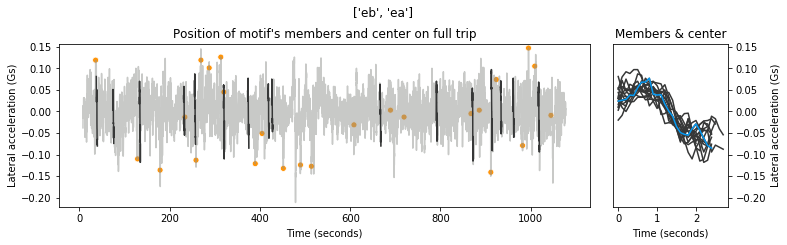

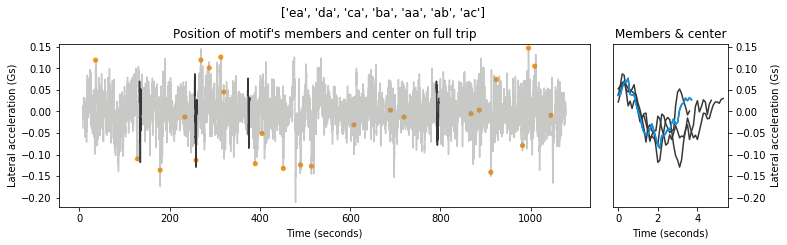

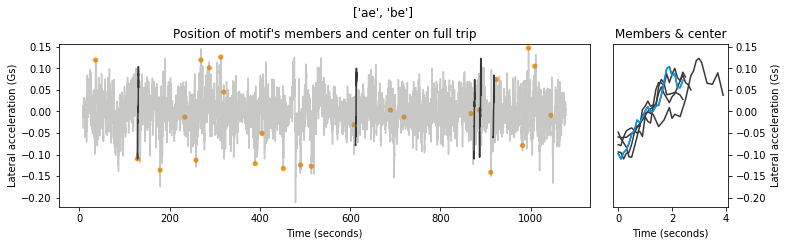

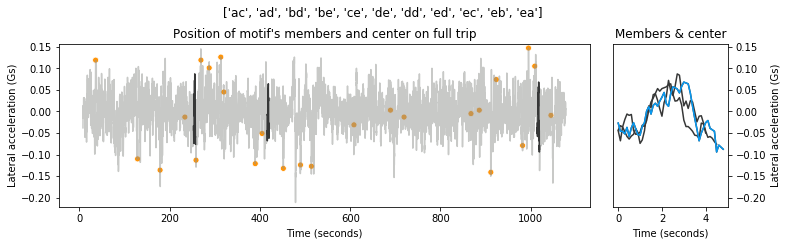

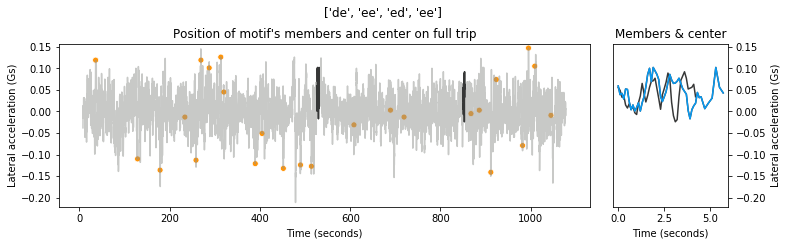

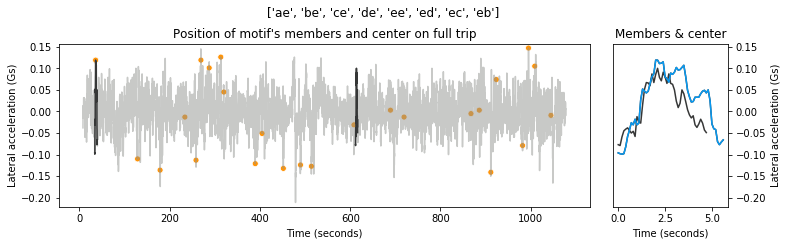

In [12]:
lat_viz.plot_k_lat_motifs(len(pruned_motif_df), trip_df, pruned_motif_dic_list)

In [13]:
motif_utils.get_limits_df(pruned_motif_dic_list[1:], trip_df)

,start,end,pattern,start_ts,end_ts
0,233,253,['ab'],33.2,35.2
1,301,320,['ab'],40.0,41.9
2,344,363,['ab'],44.3,46.2
3,406,428,['ab'],51.2,54.4
4,484,503,['ab'],60.1,62.0
5,768,787,['ab'],90.2,92.1
6,1123,1144,['ab'],128.0,130.1
7,1183,1203,['ab'],134.0,136.0
8,1380,1405,['ab'],155.7,158.2
9,1511,1535,['ab'],169.0,171.4


In [14]:
center_acc_list = []
for motif_dic in motif_dic_list:
    motif_center_acc = [ts[i] for i in motif_dic['center_ts_pointers']]
    center_acc_list.append(motif_center_acc)
center_dist_mat = motif_utils.compute_dtw_distance_matrix(center_acc_list, parallel=True)
file_name = "dist_lat_" + trip_df["trip_label"][0] + "_" + trip_df["road"][0] + ".npy"
np.save(open(os.path.join(output_folder, file_name), 'wb'), center_dist_mat)

Distance matrix computed in 60.8 minutes


<a id='section4'></a>
## 4. Normal trip

In [15]:
driver_df = uah_utils.get_full_point_uah_data(data_folder, freq_per_second)
trip_df = driver_df[driver_df['trip_id']=='20151217162714'].reset_index(drop=True)
file_name = "motif_lat_" + trip_df["trip_label"][0] + "_" + trip_df["road"][0] + ".p"
ts = trip_df['ay'].values

start_time = time.time()
motif_dic_list, ts_1d = find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
pickle.dump(motif_dic_list, open(os.path.join(output_folder, file_name), 'wb'))
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

len(motif_dic_list)

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
Motif candidates of size 11 successfully extracted
Motif candidates of size 12 successfully extracted
Motif candidates of size 13 successfully extracted
Motif candidates of size 14 successfully extracted
Motif candidates of size 15 successfully extracted
Motif candidates of size 16 successfully extracted
Motif candidates of size 17 successfully extracted
Motif candidates of size 18 successfully extracted
ExtendedMD algorithm run in 13.7 minutes


1532

In [16]:
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = motif_utils.get_motif_turn_labels_df(pruned_motif_dic_list, trip_df)
pruned_motif_df

,pattern,mdl_cost,mean_dist,pattern_len,n_motifs,turn_events,turn_ratio,lc_right,lc_right_ratio,lc_left,lc_left_ratio
0,[dc],41901.87,0.07,27,144,0,0.000000,4,0.027778,0,0.000000
1,[ab],55444.46,0.08,27,56,2,0.035714,0,0.000000,3,0.053571
2,"[aa, ba, aa]",95013.62,0.05,35,2,0,0.000000,0,0.000000,0,0.000000


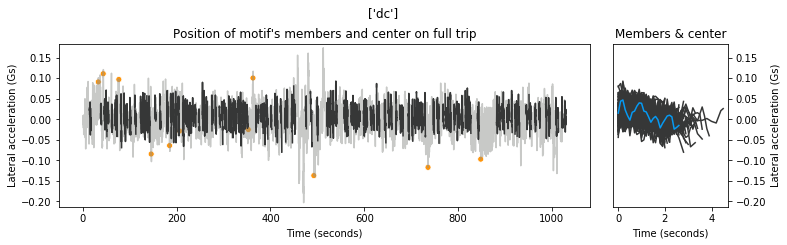

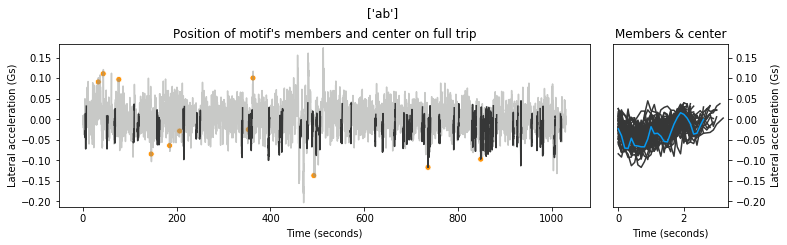

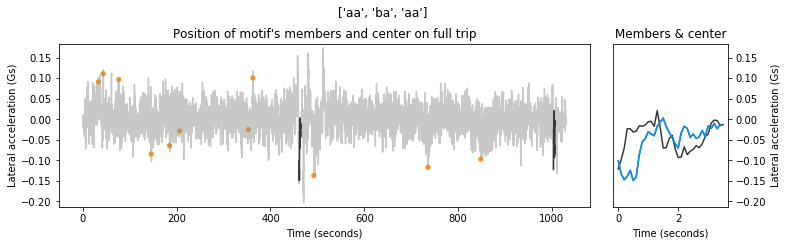

In [17]:
lat_viz.plot_k_lat_motifs(len(pruned_motif_df), trip_df, pruned_motif_dic_list)

In [18]:
motif_utils.get_limits_df(pruned_motif_dic_list[1:], trip_df)

,start,end,pattern,start_ts,end_ts
0,49,72,['ab'],5.0,7.3
1,485,509,['ab'],50.6,53.0
2,626,646,['ab'],67.2,69.2
3,1015,1036,['ab'],107.5,109.6
4,1092,1120,['ab'],116.0,119.0
5,1490,1514,['ab'],158.0,160.4
6,1520,1545,['ab'],161.0,163.5
7,2018,2039,['ab'],214.2,216.4
8,2272,2292,['ab'],241.5,243.5
9,2345,2364,['ab'],248.8,250.7


In [19]:
center_acc_list = []
for motif_dic in motif_dic_list:
    motif_center_acc = [ts[i] for i in motif_dic['center_ts_pointers']]
    center_acc_list.append(motif_center_acc)
center_dist_mat = motif_utils.compute_dtw_distance_matrix(center_acc_list, parallel=True)
file_name = "dist_lat_" + trip_df["trip_label"][0] + "_" + trip_df["road"][0] + ".npy"
np.save(open(os.path.join(output_folder, file_name), 'wb'), center_dist_mat)

Distance matrix computed in 59.2 minutes


<a id='section5'></a>
## 5. Secondary road trip

In [20]:
driver_df = uah_utils.get_full_point_uah_data(data_folder, freq_per_second)
trip_df = driver_df[driver_df['trip_id']=='20151221112434'].reset_index(drop=True)
file_name = "motif_lat_" + trip_df["trip_label"][0] + "_" + trip_df["road"][0] + ".p"
ts = trip_df['ay'].values

start_time = time.time()
motif_dic_list, ts_1d = find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
pickle.dump(motif_dic_list, open(os.path.join(output_folder, file_name), 'wb'))
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

len(motif_dic_list)

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
Motif candidates of size 11 successfully extracted
Motif candidates of size 12 successfully extracted
ExtendedMD algorithm run in 8.07 minutes


1113

In [21]:
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = motif_utils.get_motif_turn_labels_df(pruned_motif_dic_list, trip_df)
pruned_motif_df

,pattern,mdl_cost,mean_dist,pattern_len,n_motifs,turn_events,turn_ratio,lc_right,lc_right_ratio,lc_left,lc_left_ratio
0,[cc],31180.79,0.07,22,102,3,0.029412,0,0.0,0,0.0


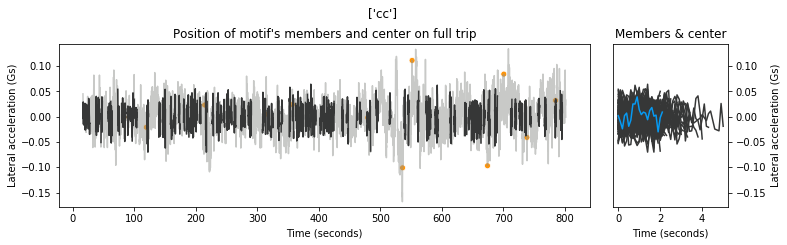

In [22]:
lat_viz.plot_k_lat_motifs(len(pruned_motif_df), trip_df, pruned_motif_dic_list)

In [23]:
center_acc_list = []
for motif_dic in motif_dic_list:
    motif_center_acc = [ts[i] for i in motif_dic['center_ts_pointers']]
    center_acc_list.append(motif_center_acc)
center_dist_mat = motif_utils.compute_dtw_distance_matrix(center_acc_list, parallel=True)
file_name = "dist_lat_" + trip_df["trip_label"][0] + "_" + trip_df["road"][0] + ".npy"
np.save(open(os.path.join(output_folder, file_name), 'wb'), center_dist_mat)

Distance matrix computed in 37.8 minutes
